# Visualización de datos - Ejercicios

A lo largo de este tutorial, utilizará un conjunto de datos del mercado de valores norteamericano de 29 empresas de 2006 a 2017. Se nos pide:

1. Preparar los datasets para crear visualizaciones
2. Graficar la siguiente información:
    - Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio.
    - Precio máximo de AAPL en 2014, 2015, 2016 y 2017.
    - Distribución del volumen de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN.
    - Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este que corresponde a cada empresa.
    - Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio.
    
    
## Diccionario de datos

El dataset tiene las siguientes columnas:

- **Date:** fecha correspondiente al valor observado
- **Open:** Precio (en USD) al mercado abierto en la fecha especificada
- **High:** precio más alto (en USD) alcanzado durante la fecha correspondiente
- **Low:** precio más bajo (en USD) alcanzado durante la fecha correspondiente
- **Close:** Precio (en USD) al cierre del mercado en la fecha especificada
- **Volumen:** número de acciones negociadas
- **Name:** Símbolo bursátil de la empresa.


## Importar librerías y leer datos

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pandas as pd

url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

## Revisiones generales

## Precio de cierre de AAPL, JPM, GOOGL y AMZN para todo el período de estudio

<AxesSubplot:title={'center':'Stock prices (2006 - 2017)'}, xlabel='Date', ylabel='Closing Price'>

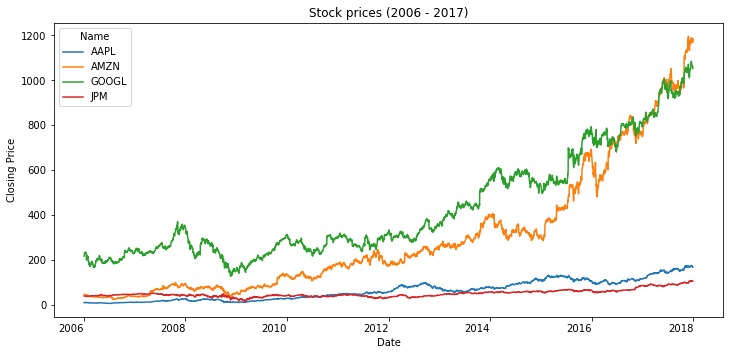

In [3]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

df = df.loc[df.Name.isin(["AAPL", "JPM", "GOOGL", "AMZN"]), ["Date", "Name", "Close"]]

df["Date"] = pd.to_datetime(df.Date)
df.rename(columns={"Close": "Closing Price"}, inplace=True)

df_wide = df.pivot(index="Date", columns="Name", values="Closing Price")
df_wide.plot(
    title="Stock prices (2006 - 2017)", ylabel="Closing Price", figsize=(12, 6), rot=0
)

## Precio máximo de AAPL en 2014, 2015, 2016 y 2017

<AxesSubplot:title={'center':'Max Closing Price per Year - AAPL'}, xlabel='Year', ylabel='Price in USD'>

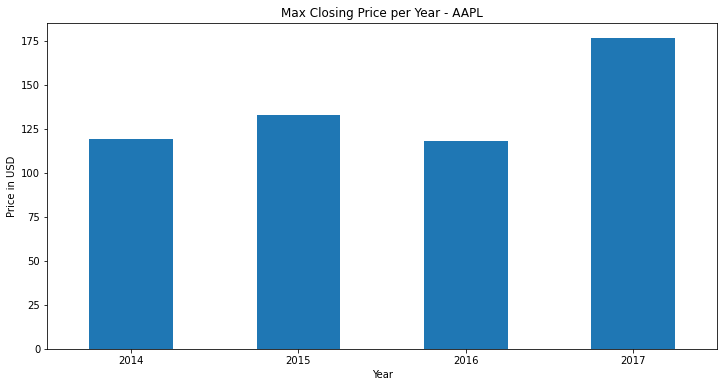

In [4]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

df = df.loc[df.Name == "AAPL", ["Date", "Close"]]
df["Year"] = pd.to_datetime(df.Date).dt.year
df = df.query("Year >= 2014").groupby("Year").max().reset_index(drop=False)

df.plot.bar(
    x="Year",
    y=["Close"],
    rot=0,
    figsize=(12, 6),
    ylabel="Price in USD",
    title="Max Closing Price per Year - AAPL",
    legend=None
)

## Distribución del volumen total de transacciones por empresa para todo el período. Sólo incluir AAPL, JPM, GOOGL y AMZN

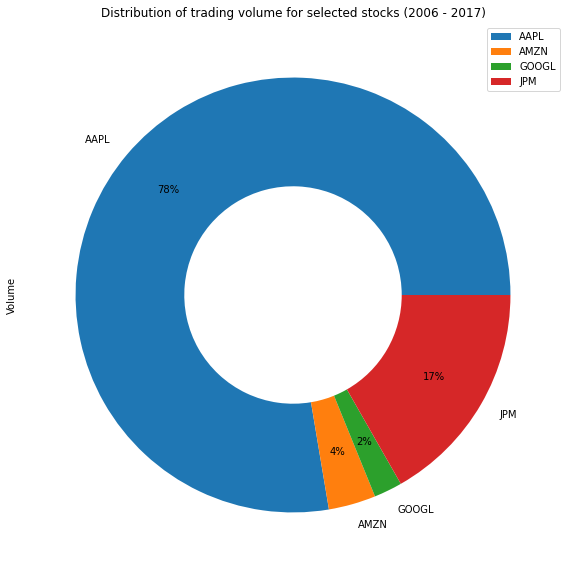

In [12]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["AAPL", "JPM", "GOOGL", "AMZN"]
df = df.loc[df.Name.isin(stocks_filter), ["Name", "Volume"]]
df = df.groupby("Name").sum().reset_index()

fig, ax = plt.subplots(figsize=(10, 10))
df.set_index("Name").plot.pie(
    y="Volume",
    wedgeprops=dict(width=0.5),
    autopct="%1.0f%%",
    pctdistance=0.75,
    title="Distribution of trading volume for selected stocks (2006 - 2017)",
    ax=ax
)
fig.set_facecolor("white")


## Volumen de transacciones anual de AAPL, JPM, GOOGL y AMAZN. En el mismo gráfico debo poder comparar el volumen por año y la proporción de este correspondiente a cada empresa.

<AxesSubplot:title={'center':'Trading volume per year for selected shares'}, xlabel='Year', ylabel='Volume (billions of shares)'>

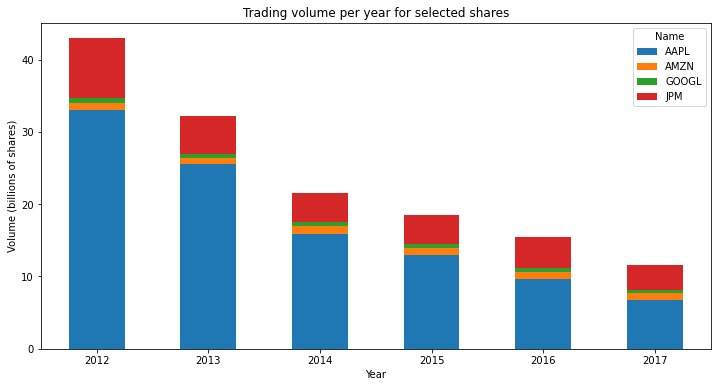

In [6]:
url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["AAPL", "JPM", "GOOGL", "AMZN"]
df = df[df.Name.isin(stocks_filter)]
df["Date"] = pd.to_datetime(df.Date)
df["Year"] = pd.to_datetime(df.Date).dt.year
df["Volume"] = df["Volume"] / 1e9

df = (
    df[["Year", "Volume", "Name"]]
    .query("Year >= 2012")
    .groupby(["Year", "Name"])
    .sum()
    .reset_index(drop=False)
)

df_wide = df.pivot(index="Year", columns="Name", values="Volume")
df_wide.plot.bar(
    rot=0,
    figsize=(12, 6),
    ylabel="Volume (billions of shares)",
    title="Trading volume per year for selected shares",
    stacked=True,
)


## Relación entre los retornos diarios (`Open` - `Close` / `Open`) de las acciones de GOOGL y AMZN durante todo el período de estudio

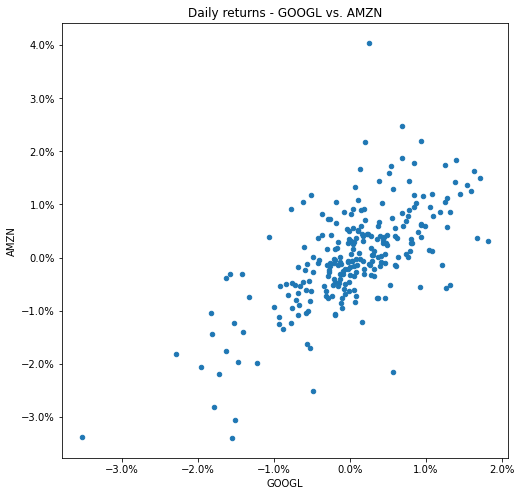

In [7]:
import matplotlib.ticker as mtick

url = "https://raw.githubusercontent.com/szrlee/Stock-Time-Series-Analysis/master/data/all_stocks_2006-01-01_to_2018-01-01.csv"
df = pd.read_csv(url)

stocks_filter = ["GOOGL", "AMZN"]
df = df.loc[
    (df.Name.isin(stocks_filter)) & (pd.to_datetime(df.Date).dt.year >= 2017),
    ["Date", "Name", "Open", "Close"],
]
df["Return"] = (df["Close"] - df["Open"]) / df["Open"]
df_wide = df.pivot(index="Date", columns="Name", values="Return")


ax = df_wide.plot.scatter(
    x="GOOGL", y="AMZN", title="Daily returns - GOOGL vs. AMZN", figsize=(8, 8)
)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))